In [1]:
# Importar librerías necesarias
import numpy as np
import h5py
import matplotlib.pyplot as plt

# Configuración para mejores gráficos
plt.style.use('default')
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 11

print("✓ Librerías importadas correctamente")

✓ Librerías importadas correctamente


In [2]:
# Cargar el dataset desde el archivo HDF5
# En Colab, después de subir el archivo, estará en /content/

filepath = '/content/tokamak_synthetic.h5'  # Ajusta si lo subiste a otra ubicación

with h5py.File(filepath, 'r') as f:
    # Cargar datos y etiquetas
    data = f['data'][:]
    labels = f['labels'][:]

    # Cargar metadatos
    signal_names = list(f.attrs['signal_names'])
    sampling_rate = f.attrs['sampling_rate']
    shot_duration = f.attrs['shot_duration']
    n_normal = f.attrs['n_normal']
    n_disruptive = f.attrs['n_disruptive']

# Mostrar información del dataset
print("=" * 50)
print("DATASET CARGADO EXITOSAMENTE")
print("=" * 50)
print(f"\nForma de los datos: {data.shape}")
print(f"  → {data.shape[0]} disparos totales")
print(f"  → {data.shape[1]} canales (señales)")
print(f"  → {data.shape[2]} muestras temporales")
print(f"\nDistribución de clases:")
print(f"  → Disparos normales (label=0): {n_normal}")
print(f"  → Disparos disruptivos (label=1): {n_disruptive}")
print(f"\nSeñales disponibles: {signal_names}")
print(f"Frecuencia de muestreo: {sampling_rate} Hz")
print(f"Duración de ventana: {shot_duration * 1000} ms")

DATASET CARGADO EXITOSAMENTE

Forma de los datos: (1000, 5, 1000)
  → 1000 disparos totales
  → 5 canales (señales)
  → 1000 muestras temporales

Distribución de clases:
  → Disparos normales (label=0): 500
  → Disparos disruptivos (label=1): 500

Señales disponibles: ['ip', 'betan', 'q95', 'density', 'li']
Frecuencia de muestreo: 10000 Hz
Duración de ventana: 100.0 ms


In [3]:
# Crear vector de tiempo en milisegundos
n_samples = data.shape[2]
time_ms = np.linspace(0, shot_duration * 1000, n_samples)

print(f"Vector de tiempo creado: {time_ms[0]:.1f} ms a {time_ms[-1]:.1f} ms")
print(f"Resolución temporal: {time_ms[1] - time_ms[0]:.3f} ms entre muestras")

Vector de tiempo creado: 0.0 ms a 100.0 ms
Resolución temporal: 0.100 ms entre muestras


In [4]:
# Separar índices por clase
idx_normal = np.where(labels == 0)[0]
idx_disruptive = np.where(labels == 1)[0]

print(f"Índices de disparos normales: {len(idx_normal)} disparos")
print(f"Índices de disparos disruptivos: {len(idx_disruptive)} disparos")

# Extraer subconjuntos
data_normal = data[idx_normal]
data_disruptive = data[idx_disruptive]

print(f"\nShape datos normales: {data_normal.shape}")
print(f"Shape datos disruptivos: {data_disruptive.shape}")

Índices de disparos normales: 500 disparos
Índices de disparos disruptivos: 500 disparos

Shape datos normales: (500, 5, 1000)
Shape datos disruptivos: (500, 5, 1000)


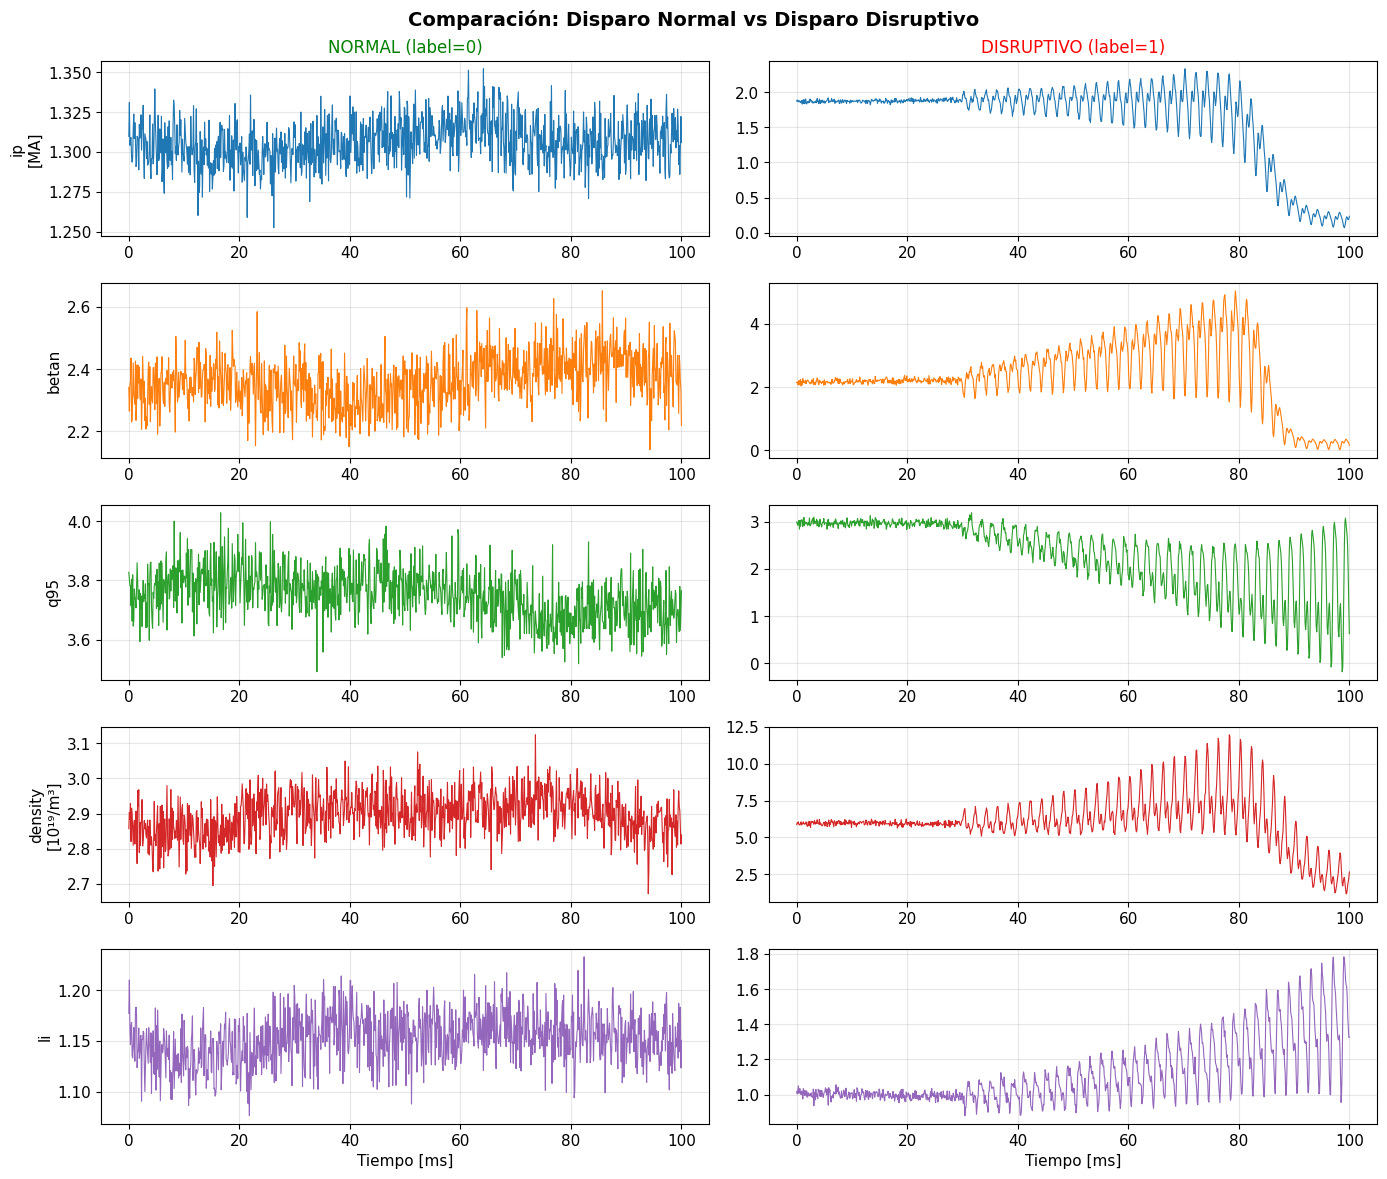


👆 OBSERVA LAS DIFERENCIAS:
   - Normal: Señales relativamente estables con pequeñas fluctuaciones
   - Disruptivo: Oscilaciones crecientes (precursores) seguidas de colapso abrupto


In [5]:
# Seleccionar un ejemplo aleatorio de cada clase
np.random.seed(42)  # Para reproducibilidad
idx_n = np.random.choice(len(data_normal))
idx_d = np.random.choice(len(data_disruptive))

shot_normal = data_normal[idx_n]
shot_disruptive = data_disruptive[idx_d]

# Crear figura con 5 filas (una por señal) y 2 columnas (normal vs disruptivo)
fig, axes = plt.subplots(5, 2, figsize=(14, 12))
fig.suptitle('Comparación: Disparo Normal vs Disparo Disruptivo', fontsize=14, fontweight='bold')

# Colores para cada señal
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']

# Unidades de cada señal (para las etiquetas)
units = ['MA', '', '', '10¹⁹/m³', '']

for i, (name, color, unit) in enumerate(zip(signal_names, colors, units)):
    # Columna izquierda: Normal
    axes[i, 0].plot(time_ms, shot_normal[i], color=color, linewidth=0.8)
    axes[i, 0].set_ylabel(f'{name}\n[{unit}]' if unit else name)
    axes[i, 0].grid(True, alpha=0.3)
    if i == 0:
        axes[i, 0].set_title('NORMAL (label=0)', fontsize=12, color='green')

    # Columna derecha: Disruptivo
    axes[i, 1].plot(time_ms, shot_disruptive[i], color=color, linewidth=0.8)
    axes[i, 1].grid(True, alpha=0.3)
    if i == 0:
        axes[i, 1].set_title('DISRUPTIVO (label=1)', fontsize=12, color='red')

    # Etiqueta de tiempo solo en la última fila
    if i == 4:
        axes[i, 0].set_xlabel('Tiempo [ms]')
        axes[i, 1].set_xlabel('Tiempo [ms]')

plt.tight_layout()
plt.show()

print("\n👆 OBSERVA LAS DIFERENCIAS:")
print("   - Normal: Señales relativamente estables con pequeñas fluctuaciones")
print("   - Disruptivo: Oscilaciones crecientes (precursores) seguidas de colapso abrupto")

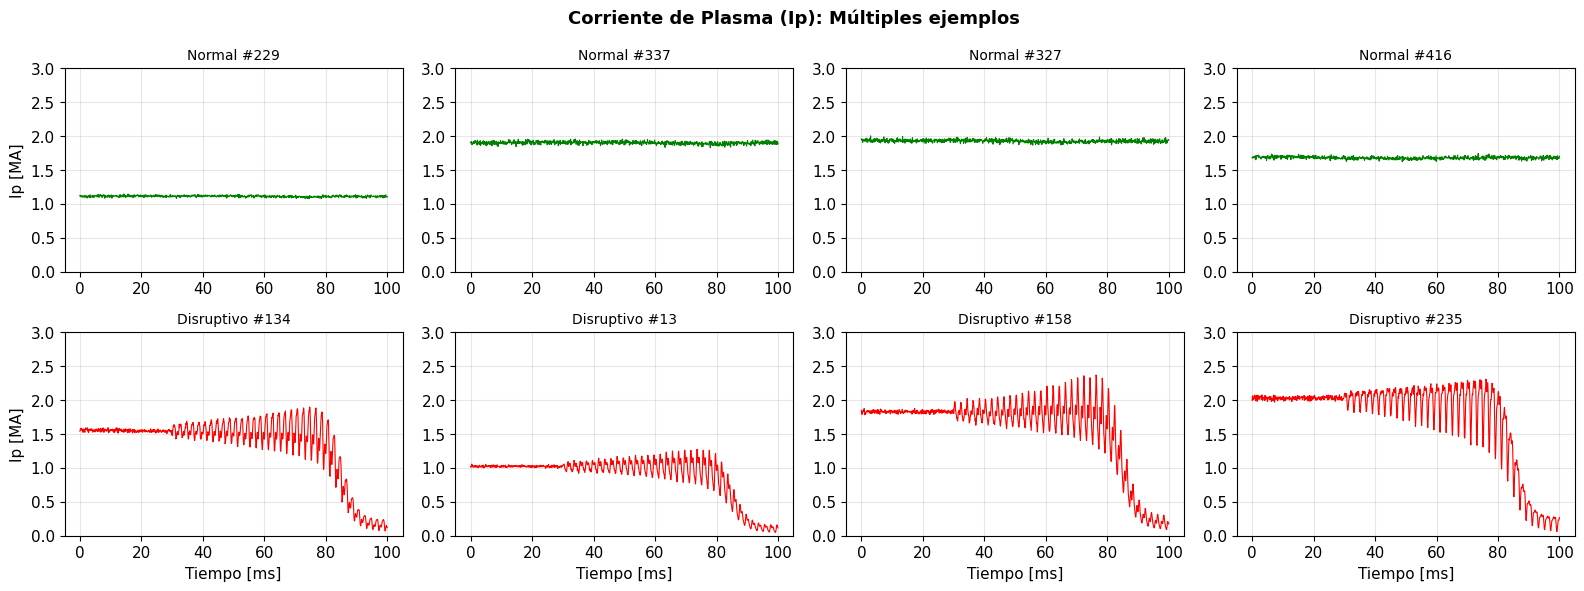

In [6]:
# Mostrar 4 ejemplos de cada clase para la señal de corriente (ip)
fig, axes = plt.subplots(2, 4, figsize=(16, 6))

# Seleccionar 4 ejemplos aleatorios de cada clase
np.random.seed(123)
examples_normal = np.random.choice(len(data_normal), 4, replace=False)
examples_disruptive = np.random.choice(len(data_disruptive), 4, replace=False)

# Fila superior: Normales
for i, idx in enumerate(examples_normal):
    axes[0, i].plot(time_ms, data_normal[idx, 0], color='green', linewidth=0.8)
    axes[0, i].set_title(f'Normal #{idx}', fontsize=10)
    axes[0, i].set_ylim([0, 3])
    axes[0, i].grid(True, alpha=0.3)
    if i == 0:
        axes[0, i].set_ylabel('Ip [MA]')

# Fila inferior: Disruptivos
for i, idx in enumerate(examples_disruptive):
    axes[1, i].plot(time_ms, data_disruptive[idx, 0], color='red', linewidth=0.8)
    axes[1, i].set_title(f'Disruptivo #{idx}', fontsize=10)
    axes[1, i].set_ylim([0, 3])
    axes[1, i].grid(True, alpha=0.3)
    axes[1, i].set_xlabel('Tiempo [ms]')
    if i == 0:
        axes[1, i].set_ylabel('Ip [MA]')

fig.suptitle('Corriente de Plasma (Ip): Múltiples ejemplos', fontsize=13, fontweight='bold')
plt.tight_layout()
plt.show()

In [7]:
# Calcular estadísticas para cada canal y clase
print("=" * 70)
print("ESTADÍSTICAS POR CANAL")
print("=" * 70)

for i, name in enumerate(signal_names):
    normal_mean = np.mean(data_normal[:, i, :])
    normal_std = np.std(data_normal[:, i, :])
    disruptive_mean = np.mean(data_disruptive[:, i, :])
    disruptive_std = np.std(data_disruptive[:, i, :])

    print(f"\n{name.upper()}:")
    print(f"  Normal     → Media: {normal_mean:.3f}, Std: {normal_std:.3f}")
    print(f"  Disruptivo → Media: {disruptive_mean:.3f}, Std: {disruptive_std:.3f}")

ESTADÍSTICAS POR CANAL

IP:
  Normal     → Media: 1.489, Std: 0.287
  Disruptivo → Media: 1.291, Std: 0.517

BETAN:
  Normal     → Media: 1.997, Std: 0.358
  Disruptivo → Media: 2.201, Std: 1.072

Q95:
  Normal     → Media: 3.926, Std: 0.651
  Disruptivo → Media: 3.312, Std: 1.105

DENSITY:
  Normal     → Media: 5.499, Std: 1.573
  Disruptivo → Media: 5.285, Std: 2.188

LI:
  Normal     → Media: 1.003, Std: 0.123
  Disruptivo → Media: 1.124, Std: 0.216


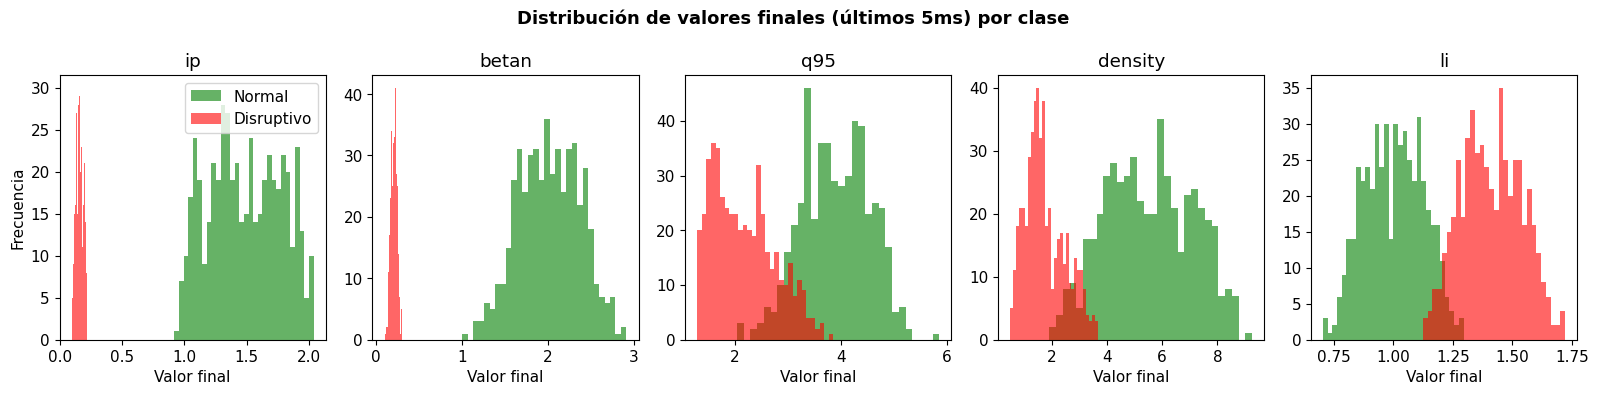


👆 OBSERVACIÓN CLAVE:
   Los valores finales muestran SEPARACIÓN CLARA entre clases
   Esto indica que el modelo de ML debería poder distinguirlas


In [8]:
# Los valores al final del disparo son muy informativos
# En disparos disruptivos, las señales colapsan al final

fig, axes = plt.subplots(1, 5, figsize=(16, 4))

for i, name in enumerate(signal_names):
    # Tomar los últimos 50 puntos (últimos 5ms) y promediar
    final_normal = data_normal[:, i, -50:].mean(axis=1)
    final_disruptive = data_disruptive[:, i, -50:].mean(axis=1)

    # Histogramas
    axes[i].hist(final_normal, bins=30, alpha=0.6, label='Normal', color='green')
    axes[i].hist(final_disruptive, bins=30, alpha=0.6, label='Disruptivo', color='red')
    axes[i].set_title(name)
    axes[i].set_xlabel('Valor final')
    if i == 0:
        axes[i].set_ylabel('Frecuencia')
        axes[i].legend()

fig.suptitle('Distribución de valores finales (últimos 5ms) por clase', fontsize=13, fontweight='bold')
plt.tight_layout()
plt.show()

print("\n👆 OBSERVACIÓN CLAVE:")
print("   Los valores finales muestran SEPARACIÓN CLARA entre clases")
print("   Esto indica que el modelo de ML debería poder distinguirlas")

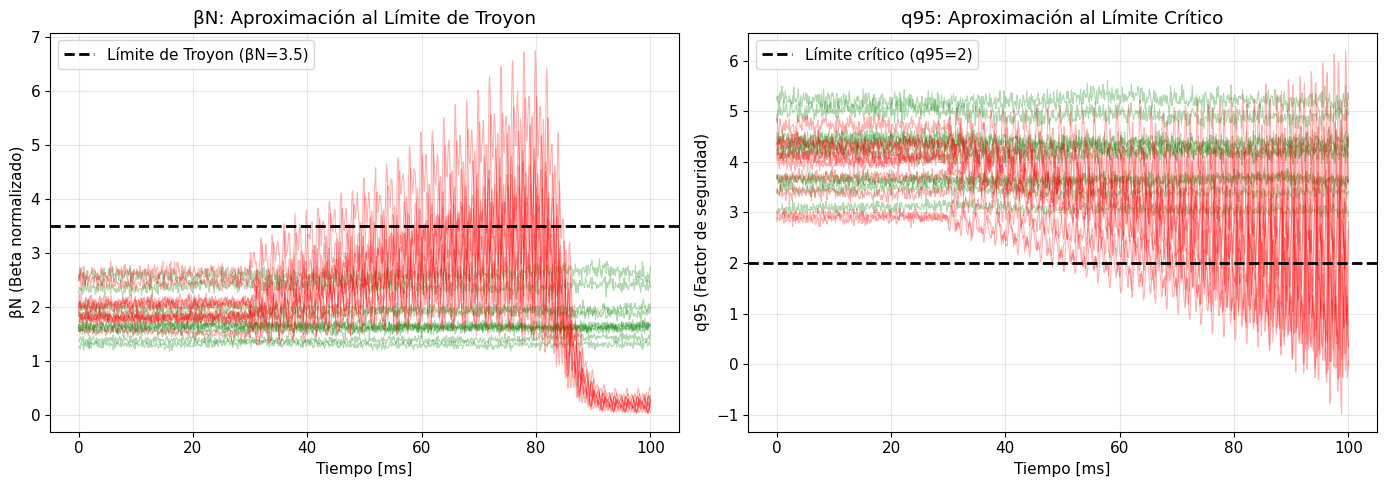


👆 FÍSICA DE LA DISRUPCIÓN:
   - βN (izquierda): Los disruptivos SE ACERCAN al límite de Troyon antes de colapsar
   - q95 (derecha): Los disruptivos CAEN hacia el valor crítico de 2


In [9]:
# Mostrar cómo βN se acerca al límite de Troyon en disparos disruptivos
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# βN (Beta normalizado) - Límite de Troyon es ~3.5
ax = axes[0]
for idx in np.random.choice(len(data_normal), 10, replace=False):
    ax.plot(time_ms, data_normal[idx, 1], color='green', alpha=0.3, linewidth=0.8)
for idx in np.random.choice(len(data_disruptive), 10, replace=False):
    ax.plot(time_ms, data_disruptive[idx, 1], color='red', alpha=0.3, linewidth=0.8)
ax.axhline(y=3.5, color='black', linestyle='--', linewidth=2, label='Límite de Troyon (βN=3.5)')
ax.set_xlabel('Tiempo [ms]')
ax.set_ylabel('βN (Beta normalizado)')
ax.set_title('βN: Aproximación al Límite de Troyon')
ax.legend()
ax.grid(True, alpha=0.3)

# q95 (Factor de seguridad) - Límite crítico es ~2
ax = axes[1]
for idx in np.random.choice(len(data_normal), 10, replace=False):
    ax.plot(time_ms, data_normal[idx, 2], color='green', alpha=0.3, linewidth=0.8)
for idx in np.random.choice(len(data_disruptive), 10, replace=False):
    ax.plot(time_ms, data_disruptive[idx, 2], color='red', alpha=0.3, linewidth=0.8)
ax.axhline(y=2.0, color='black', linestyle='--', linewidth=2, label='Límite crítico (q95=2)')
ax.set_xlabel('Tiempo [ms]')
ax.set_ylabel('q95 (Factor de seguridad)')
ax.set_title('q95: Aproximación al Límite Crítico')
ax.legend()
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n👆 FÍSICA DE LA DISRUPCIÓN:")
print("   - βN (izquierda): Los disruptivos SE ACERCAN al límite de Troyon antes de colapsar")
print("   - q95 (derecha): Los disruptivos CAEN hacia el valor crítico de 2")

In [10]:
print("=" * 70)
print("RESUMEN DEL ANÁLISIS EXPLORATORIO")
print("=" * 70)

print("""
✓ DATASET:
  - 1000 disparos totales (500 normales + 500 disruptivos)
  - 5 canales: ip, betan, q95, density, li
  - 1000 muestras temporales (100 ms a 10 kHz)

✓ DIFERENCIAS OBSERVADAS ENTRE CLASES:

  DISPAROS NORMALES:
  - Señales relativamente estables
  - Pequeñas fluctuaciones (ruido + turbulencia)
  - Valores dentro de límites operacionales seguros

  DISPAROS DISRUPTIVOS:
  - Oscilaciones MHD crecientes (precursores)
  - βN aumenta hacia el límite de Troyon (~3.5)
  - q95 disminuye hacia el valor crítico (~2)
  - li aumenta (perfil de corriente se contrae)
  - Colapso abrupto al final (thermal quench)

✓ VIABILIDAD PARA ML:
  - Las clases son VISUALMENTE DISTINGUIBLES
  - Los valores finales muestran BUENA SEPARACIÓN
  - Un modelo de clasificación debería funcionar bien

✓ SIGUIENTE PASO:
  - Día 3: Implementar DataLoader para PyTorch
  - Día 4: Crear modelo baseline (CNN simple)
""")

RESUMEN DEL ANÁLISIS EXPLORATORIO

✓ DATASET:
  - 1000 disparos totales (500 normales + 500 disruptivos)
  - 5 canales: ip, betan, q95, density, li
  - 1000 muestras temporales (100 ms a 10 kHz)

✓ DIFERENCIAS OBSERVADAS ENTRE CLASES:

  DISPAROS NORMALES:
  - Señales relativamente estables
  - Pequeñas fluctuaciones (ruido + turbulencia)
  - Valores dentro de límites operacionales seguros

  DISPAROS DISRUPTIVOS:
  - Oscilaciones MHD crecientes (precursores)
  - βN aumenta hacia el límite de Troyon (~3.5)
  - q95 disminuye hacia el valor crítico (~2)
  - li aumenta (perfil de corriente se contrae)
  - Colapso abrupto al final (thermal quench)

✓ VIABILIDAD PARA ML:
  - Las clases son VISUALMENTE DISTINGUIBLES
  - Los valores finales muestran BUENA SEPARACIÓN
  - Un modelo de clasificación debería funcionar bien

✓ SIGUIENTE PASO:
  - Día 3: Implementar DataLoader para PyTorch
  - Día 4: Crear modelo baseline (CNN simple)

